<a href="https://colab.research.google.com/github/rubengamarro/practicas_aprendizaje_no_supervisado/blob/main/2_Reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

In [69]:
import pandas as pd
import numpy as np

In [70]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_ejer1 = data.data
y_ejer1 = data.target

In [71]:
from sklearn.model_selection import train_test_split
X_ent, X_test, y_ent, y_test = train_test_split(X_ejer1, y_ejer1, test_size=0.3, stratify=y_ejer1, random_state=0)

**Apartado a**

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ent_std = sc.fit_transform(X_ent)
X_test_std = sc.transform(X_test)

In [73]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_ent_std)

PCA()

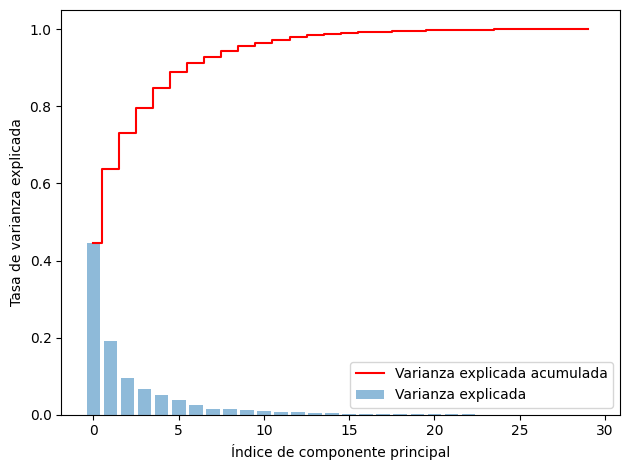

In [74]:
import matplotlib.pyplot as plt

#Calculamos varianza explicada y varianza explicada acumlada
var_exp = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)

#Dibujamos
plt.bar(range(0, X_ent_std.shape[1]), var_exp, alpha=0.5, align='center',
        label='Varianza explicada')
plt.step(range(0, X_ent_std.shape[1]), var_exp_acum, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Tasa de varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Apartado b**

In [75]:
#Modelo original
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_orig = SVC(gamma='auto')
svm_orig.fit(X_ent_std, y_ent)
exact_orig = accuracy_score(y_test, svm_orig.predict(X_test_std))
print('Exactitud en test original: %.3f'%exact_orig)

Exactitud en test original: 0.953


In [76]:
#Modelo LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_ent_lda = lda.fit_transform(X_ent_std, y_ent)
X_test_lda= lda.transform(X_test_std)
svm_lda = SVC(gamma='auto')
svm_lda.fit(X_ent_lda, y_ent)
exact_lda = accuracy_score(y_test, svm_lda.predict(X_test_lda))
print('Exactitud en test LDA: %.3f'%exact_lda)

Exactitud en test LDA: 0.942


In [77]:
#Modelo PCA
exact_pca = []
for n in range(1, X_ent_std.shape[1] + 1):
    pca = PCA(n_components=n)
    X_ent_pca = pca.fit_transform(X_ent_std)
    X_test_pca = pca.transform(X_test_std)
    svm_pca = SVC(gamma='auto')
    svm_pca.fit(X_ent_pca, y_ent)
    exact = accuracy_score(y_test, svm_pca.predict(X_test_pca))
    exact_pca.append(exact)

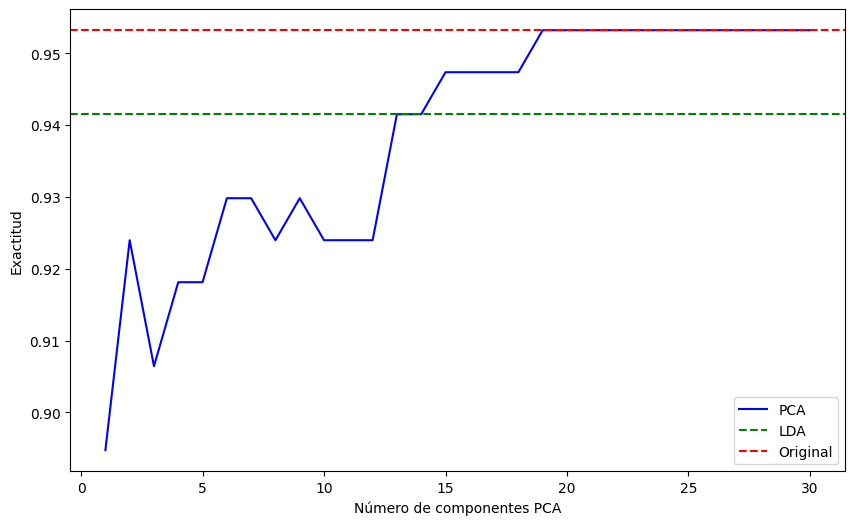

In [78]:
# Dibujo de las exactitudes
plt.figure(figsize=(10,6))
plt.plot(range(1, len(exact_pca)+1), exact_pca, color='blue', label="PCA")
plt.axhline(y=exact_lda, color='green', linestyle='--', label="LDA")
plt.axhline(y=exact_orig, color='red', linestyle='--', label="Original")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Exactitud")
plt.legend()
plt.show()

**Apartado b**

La técnica de dimensionalidad que consigue una mayor exactitud es el PCA, que supera al LDA a partir de 14 componentes e iguala al conjunto original de rasgos a partir de los 19 componentes.
Sí, como ya he dicho el PCA iguala a la exactitud original a partir de 19 componentes.
Si quisiera reducir el tiempo de predicción y mantener una buena exactitud en la predicción utilizaría LDA, ya que su coste computacional es mucho menor y aun así sigue obteniendo una muy buena exactitud (0.94).

#EJERCICIO 2

In [79]:
from sklearn.datasets import load_wine
data = load_wine()
X_ejer2 = data.data

**Apartado a**

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ejer2_std = sc.fit_transform(X_ejer2)

In [81]:
pca_ejer2 = PCA(n_components=2)
X_ent_pca2 = pca_ejer2.fit_transform(X_ejer2_std)

**Apartado b**

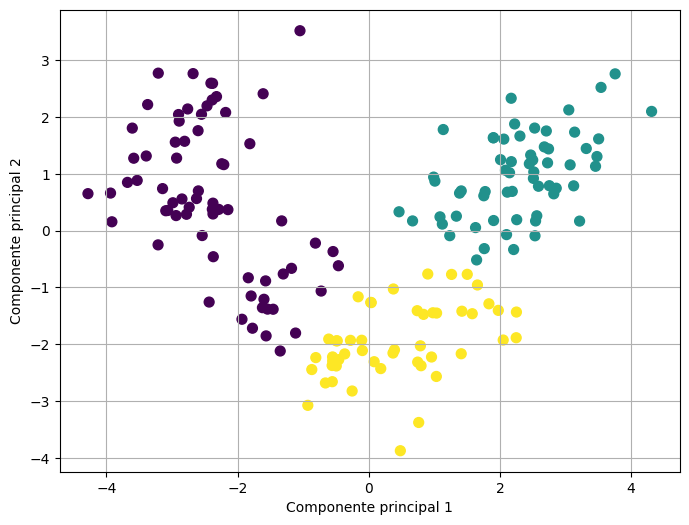

In [82]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
clusters = clustering.fit_predict(X_ent_pca2)

# Dibujar el resultado
plt.figure(figsize=(8,6))
plt.scatter(X_ent_pca2[:,0], X_ent_pca2[:,1], c=clusters, s=50)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

#EJERCICIO 3

In [83]:
data = np.load('ReduccionDimEjerc3.npz')
X_ejerc3 = data['data']
y_ejerc3 = data['target']

**Apartado a**

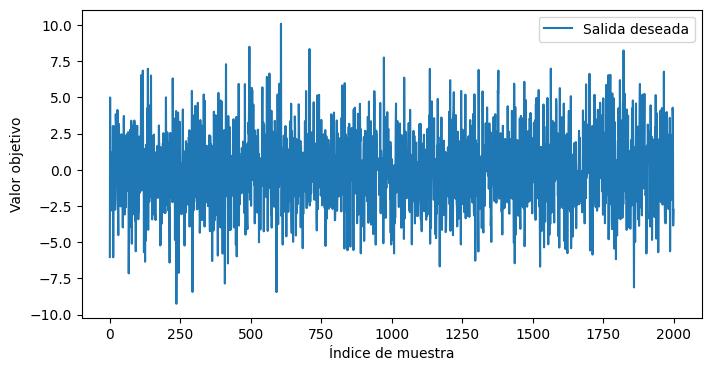

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(y_ejerc3, label="Salida deseada")
plt.xlabel("Índice de muestra")
plt.ylabel("Valor objetivo")
plt.legend()
plt.show()

**Apartado b**

Se trata de un problema de regresión ya que la salida es continua.

**Apartado c**

In [85]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X_ejerc3, y_ejerc3, test_size=0.3, random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ent_std = sc.fit_transform(X_ent)
X_test_std = sc.transform(X_test)

In [87]:
from sklearn.decomposition import PCA

pca3 = PCA()
X_ent_pca = pca3.fit_transform(X_ent_std)
X_test_pca = pca3.transform(X_test_std)

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

r2_scores = []
var_exp = pca3.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)

for i in range(1, X_ent_pca.shape[1]+1):
    model = RandomForestRegressor(n_estimators=1000, random_state=1)
    model.fit(X_ent_pca[:,:i], y_ent)
    y_pred = model.predict(X_test_pca[:,:i])
    r2_scores.append(r2_score(y_test, y_pred))

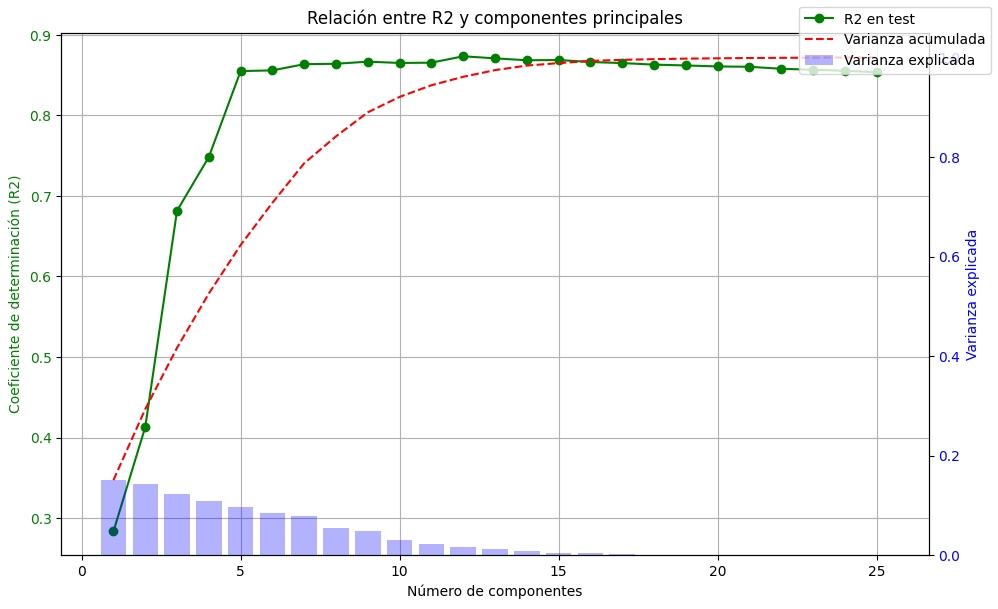

In [97]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(range(1, len(r2_scores)+1), r2_scores, 'g-o', label='R2 en test')
ax1.set_xlabel('Número de componentes')
ax1.set_ylabel('Coeficiente de determinación (R2)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)


ax2 = ax1.twinx()
ax2.bar(range(1, len(var_exp)+1), var_exp, alpha=0.3, color='blue', label='Varianza explicada')
ax2.plot(range(1, len(var_exp_acum)+1), var_exp_acum, 'r--', label='Varianza acumulada')
ax2.set_ylabel('Varianza explicada', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
fig.legend(loc='upper right')
plt.title('Relación entre R2 y componentes principales')
plt.show()

**Apartado d**

Existe mejoría hasta un cierto punto, al aumentar el nº de componentes hasta 5 podemos ver como el coeficiente aumenta drásticamente, sin embargo, a partir de 5 componentes podemos ver como el coeficiente se queda estancado. La varianza acumulada se estabiliza entre los 10-15 componentes, por lo que no coinciden en el punto de estabilización. Esto sucede porque la varianza acumulada captura progresivamente la toda la varianza de los datos, tardando más en estabilizarse, mientras que el coeficiente de determinación solo necesita las componentes principales más relevantes para predecir bien la salida continua, luego se estabiliza antes.

#EJERCICIO 4

In [166]:
from sklearn import datasets
X_ejec4, y_ejec4 = datasets.load_digits(return_X_y=True)

In [167]:
from sklearn.model_selection import train_test_split

X_ent, X_test, y_ent, y_test = train_test_split(X_ejec4, y_ejec4, test_size=0.3, random_state=0)

In [168]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ent_std = sc.fit_transform(X_ent)
X_test_std = sc.transform(X_test)

**Apartado a**

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

#Seleccion de rasgos con bosques aleatorios
selec_bosques = RandomForestClassifier(n_estimators=200, random_state=10)
selec_bosques.fit(X_ent_std, y_ent)
modelo = SelectFromModel(selec_bosques, prefit=True)
X_ent_bosq = modelo.transform(X_ent_std)
X_test_bosq = modelo.transform(X_test_std)

clf_bosq = RandomForestClassifier(n_estimators=200, random_state=10)
clf_bosq.fit(X_ent_bosq, y_ent)
y_pred_bosq = clf_bosq.predict(X_test_bosq)
exact_bosq = accuracy_score(y_test, y_pred_bosq)

#Seleccion de rasgos con PCA
pca = PCA(n_components=2)
X_ent_pca = pca.fit_transform(X_ent_std)
X_test_pca = pca.transform(X_test_std)

clf_pca = RandomForestClassifier(n_estimators=200, random_state=10)
clf_pca.fit(X_ent_pca, y_ent)
y_pred_pca = clf_pca.predict(X_test_pca)
exact_pca = accuracy_score(y_test, y_pred_pca)

#Seleccion de rasgos con LDA
lda = LDA(n_components=2)
X_ent_lda = lda.fit_transform(X_ent_std, y_ent)
X_test_lda = lda.transform(X_test_std)

clf_lda = RandomForestClassifier(n_estimators=200, random_state=10)
clf_lda.fit(X_ent_lda, y_ent)
y_pred_lda = clf_lda.predict(X_test_lda)
exact_lda = accuracy_score(y_test, y_pred_lda)

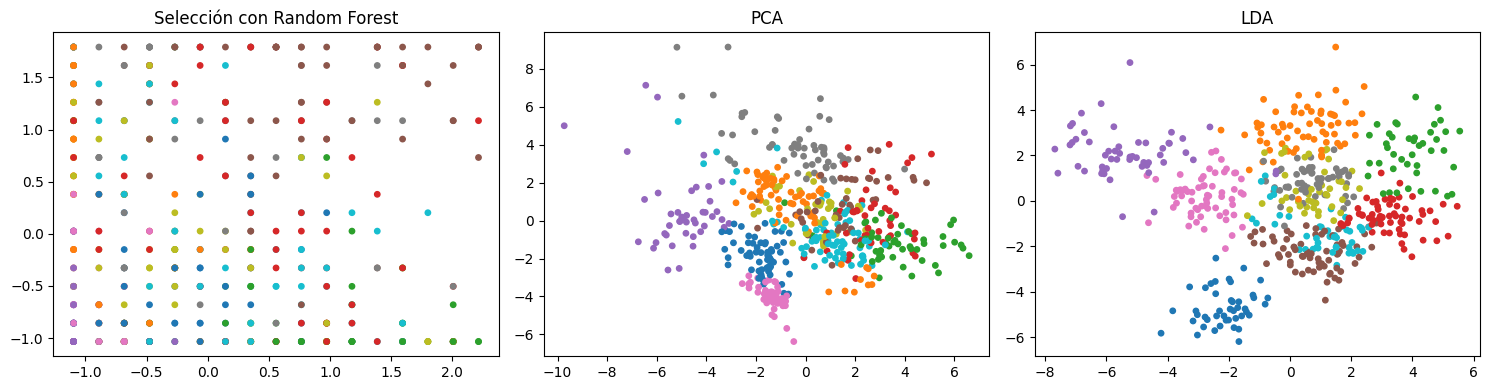

In [170]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X_test_bosq[:,0], X_test_bosq[:,1], c=y_pred_bosq, cmap='tab10', s=15)
plt.title("Selección con Random Forest")

plt.subplot(1,3,2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred_pca, cmap='tab10', s=15)
plt.title("PCA")

plt.subplot(1,3,3)
plt.scatter(X_test_lda[:,0], X_test_lda[:,1], c=y_pred_lda, cmap='tab10', s=15)
plt.title("LDA")

plt.tight_layout()
plt.show()

**Apartado b**

La estrategia que parece separar mejor las muestras es LDA.

**Apartado c**

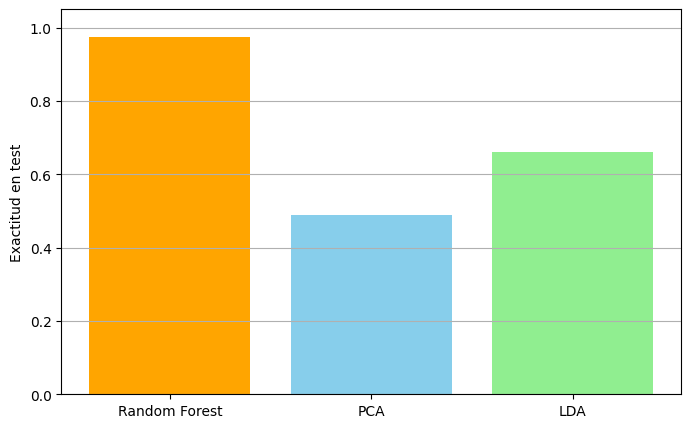

In [171]:
estrategias = ['Random Forest', 'PCA', 'LDA']
exactitudes = [exact_bosq, exact_pca, exact_lda]

plt.figure(figsize=(8,5))
plt.bar(estrategias, exactitudes, color=['orange', 'skyblue', 'lightgreen'])
plt.ylabel("Exactitud en test")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.show()

#EJERCICIO 5

**Apartado a**

In [142]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

num_rasgos = list(range(3, 104, 5))
exactitudes = []

for n in num_rasgos:
    X, y = make_classification(n_samples = 1000, n_classes = 2, n_features=n, n_informative = 3, n_redundant = 0)
    knn = KNeighborsClassifier(n_neighbors=5)
    val_cr = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
    exactitudes.append(val_cr)

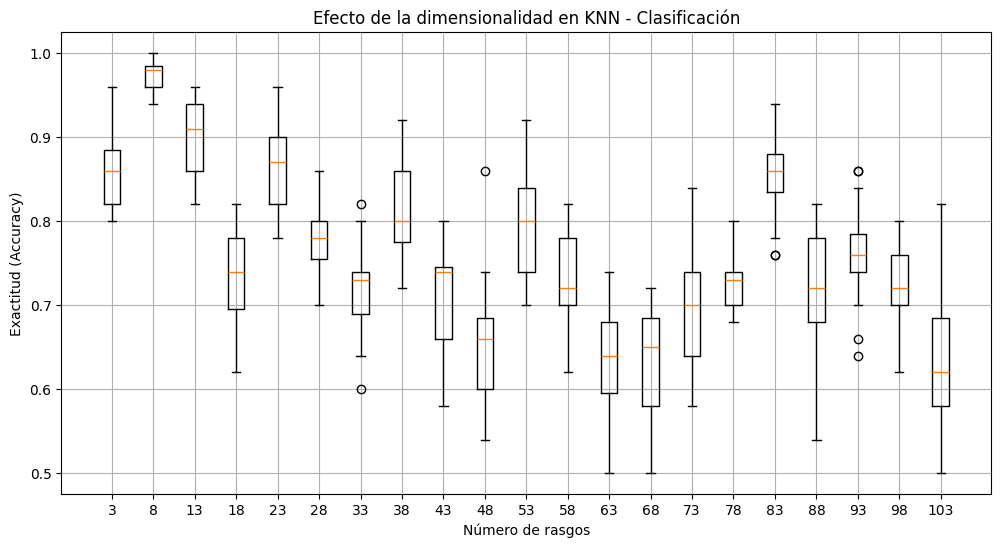

In [143]:
plt.figure(figsize=(12,6))
plt.boxplot(exactitudes, positions=num_rasgos, widths=2)
plt.xlabel("Número de rasgos")
plt.ylabel("Exactitud")
plt.title("Efecto de la dimensionalidad en KNN")
plt.grid(True)
plt.show()

**Apartado b**

Podemos ver que a medida que aumenta el número de rasgos la exactitud tiende a disminuir, por lo que claramente estamos ante el problema de la maldición de la dimensionalidad.

**Apartado c**

In [145]:
exactitudes_lca = []

for n in num_rasgos:
    X, y = make_classification(n_samples = 1000, n_classes = 2, n_features=n, n_informative = 3, n_redundant = 0)
    lda = LDA()
    X_lda = lda.fit_transform(X, y)
    knn = KNeighborsClassifier(n_neighbors=5)
    val_cr_lda = cross_val_score(knn, X_lda, y, cv=20, scoring='accuracy')
    exactitudes_lca.append(val_cr_lda)

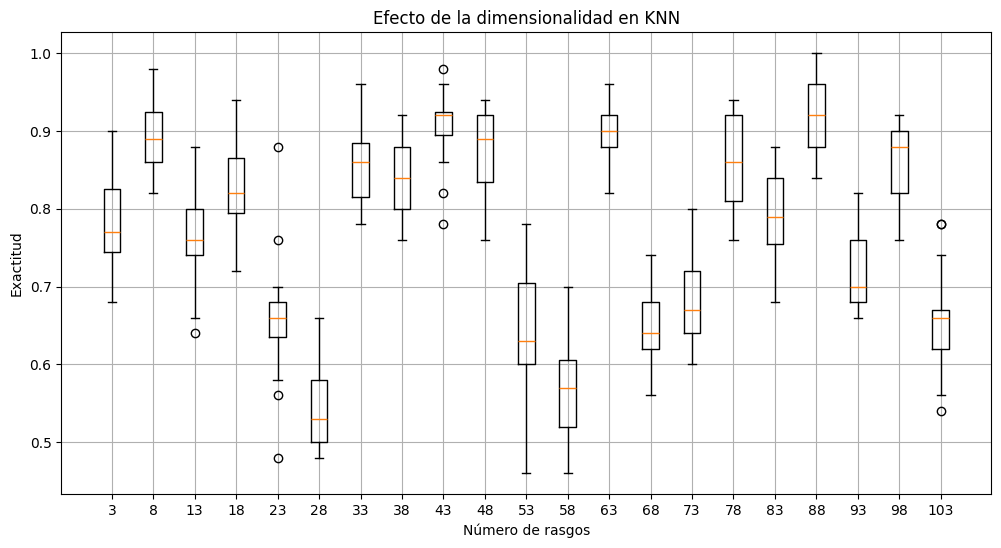

In [146]:
plt.figure(figsize=(12,6))
plt.boxplot(exactitudes_lca, positions=num_rasgos, widths=2)
plt.xlabel("Número de rasgos")
plt.ylabel("Exactitud")
plt.title("Efecto de la dimensionalidad en KNN")
plt.grid(True)
plt.show()

Podemos observar que aplicando antes LDA no se observa que se produzca el problema de maldicion de la dimensionalidad.

**Apartado d**

In [147]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

num_rasgos = list(range(3, 104, 5))
coefs_det = []

for n in num_rasgos:
    X, y = make_regression(n_samples=1000, n_features = n, n_informative = 3, noise=0.35, random_state=35)
    svr = SVR()
    val_cr = cross_val_score(svr, X, y, cv=20, scoring='r2')
    coefs_det.append(val_cr)

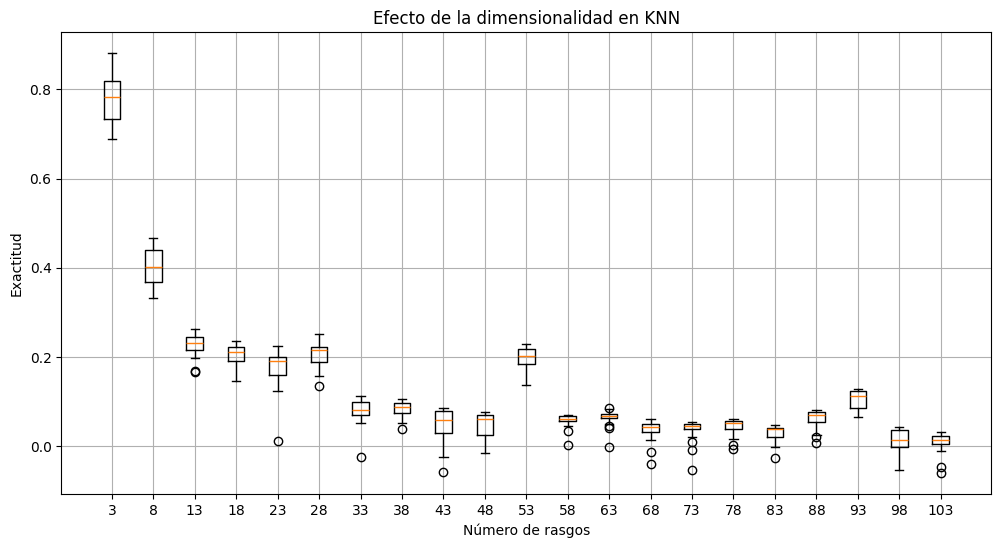

In [148]:
plt.figure(figsize=(12,6))
plt.boxplot(coefs_det, positions=num_rasgos, widths=2)
plt.xlabel("Número de rasgos")
plt.ylabel("Coeficiente de determinación")
plt.title("Efecto de la dimensionalidad en SVR")
plt.grid(True)
plt.show()

**Apartado e**

El regresor SVR disminuye el coeficiente de determinación considerablemente al aumentar los rasgos, lo que muestra claramente el problema de la maldicion de la dimensionalidad.

**Apartado f**

In [151]:
coefs_det_pca = []

for n in num_rasgos:
    X, y = make_regression(n_samples=1000, n_features = n, n_informative = 3, noise=0.35, random_state=35)
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    svr = SVR()
    val_cr_pca = cross_val_score(svr, X_pca, y, cv=20, scoring='r2')
    coefs_det_pca.append(val_cr_pca)

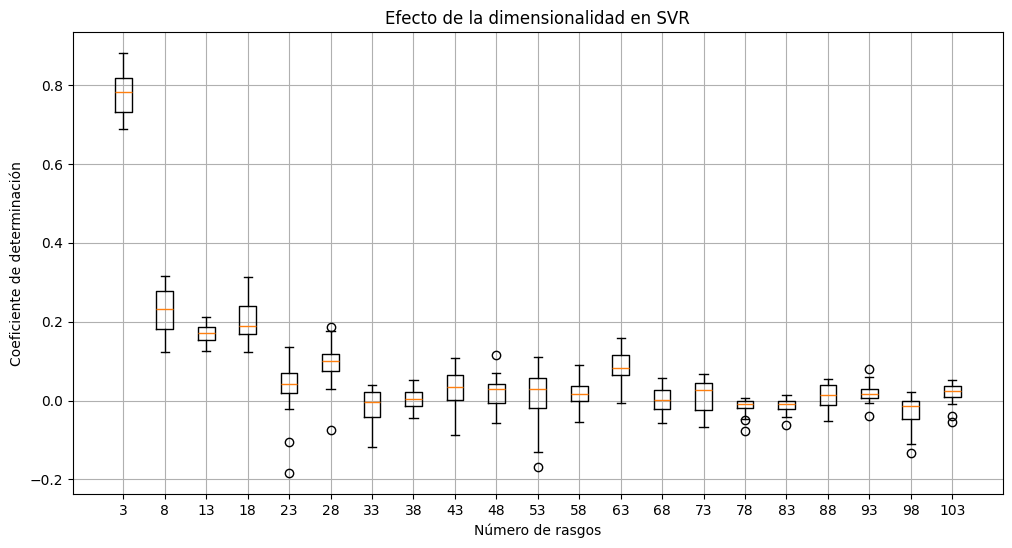

In [152]:
plt.figure(figsize=(12,6))
plt.boxplot(coefs_det_pca, positions=num_rasgos, widths=2)
plt.xlabel("Número de rasgos")
plt.ylabel("Coeficiente de determinación")
plt.title("Efecto de la dimensionalidad en SVR")
plt.grid(True)
plt.show()

Aunque siga habiendo problema de la maldición de la dimensionalidad, podemos ver que a partir de 8 rasgos se estabiliza un poco el R2 y no disminuye tanto comparado con el apartado anterior.

#EJERCICIO 6

In [159]:
from PIL import Image
import numpy as np
#Cargamos todas las imágenes
imagenes = []
for i in range(1, 32):
    nombreImagen = f'fake_and_real_peppers_ms_{i:02d}.png'
    imagen = Image.open(nombreImagen)
    imagenes.append(np.asarray(imagen))

hiperimagen = np.stack(imagenes, axis=-1)
print("Forma del array multiespectral:", hiperimagen.shape)

#Obtenemos número de filas, columnas y canales de color
fil = hiperimagen.shape[0]
col = hiperimagen.shape[1]
canales = hiperimagen.shape[2]
#Aplanamos array de imagen para pasar a una lista de filxcol muestras con
#tantos rasgos como canales tenga la imagen
X = hiperimagen.reshape((fil*col, canales))

Forma del array multiespectral: (512, 512, 31)


In [160]:
canal_1 = hiperimagen[:, :, 30].astype(np.float32)
canal_2 = hiperimagen[:, :, 15].astype(np.float32)
canal_3 = hiperimagen[:, :, 0].astype(np.float32)

img_rgb = np.stack((canal_1, canal_2, canal_3), axis=-1)

img_rgb -= img_rgb.min()
img_rgb /= img_rgb.max()
img_rgb *= 255.0
img_rgb = img_rgb.astype(np.uint8)

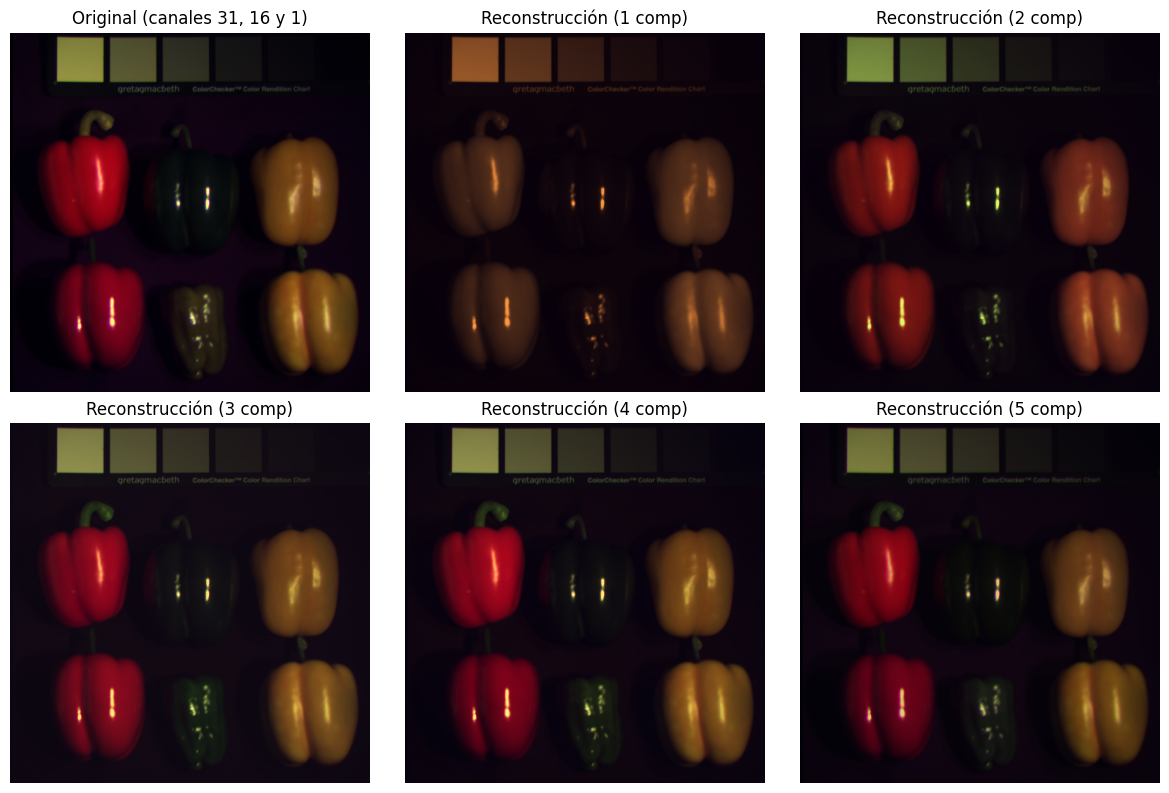

In [161]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

#Imagen original en la primera subfigura
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Original (canales 31, 16 y 1)")
axes[0, 0].axis('off')

#Reconstrucciones PCA
for i, n_comp in enumerate(range(1, 6)):
    pca = PCA(n_components=n_comp)
    X_red = pca.fit_transform(X)
    X_rec = pca.inverse_transform(X_red)
    rec_img = X_rec.reshape((fil, col, canales))

    rec_canal_1 = rec_img[:, :, 30].astype(np.float32)
    rec_canal_2 = rec_img[:, :, 15].astype(np.float32)
    rec_canal_3 = rec_img[:, :, 0].astype(np.float32)
    rec_rgb = np.stack((rec_canal_1, rec_canal_2, rec_canal_3), axis=-1)

    rec_rgb -= rec_rgb.min()
    rec_rgb /= rec_rgb.max()
    rec_rgb *= 255.0
    rec_rgb = rec_rgb.astype(np.uint8)

    ax = axes[(i+1)//3, (i+1)%3]  # posiciones del 1 al 5
    ax.imshow(rec_rgb)
    ax.set_title(f"Reconstrucción ({n_comp} comp)")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Apartado b**

Se puede ver claramente como a menor número de componentes, la imagen reconstruida tiene menos calidad. A medida que se aumenta el número de componentes la calidad de la reconstrucción mejora progresivamente. Dicha variación puede deberse a la perdida de información al reducir componentes.

**Apartado c**

In [163]:
from PIL import Image
import numpy as np
# Cargar imagen
img = Image.open('baboon.tif')
# Convertir objeto imagen a array numpy
imagen = np.asarray(img)
#Obtenemos número de filas, columnas y canales de color
fil = imagen.shape[0]
col = imagen.shape[1]
canales = imagen.shape[2]
#Aplanamos array de imagen para pasar a una lista de filxcol muestras con
#tantos rasgos como canales tenga la imagen
X = imagen.reshape((fil*col, canales))

In [164]:
ventanas = []
for i in range(0, fil, 8):
    for j in range(0, col, 8):
        bloque = imagen[i:i+8, j:j+8, :].reshape(-1)
        ventanas.append(bloque)
ventanas = np.array(ventanas)

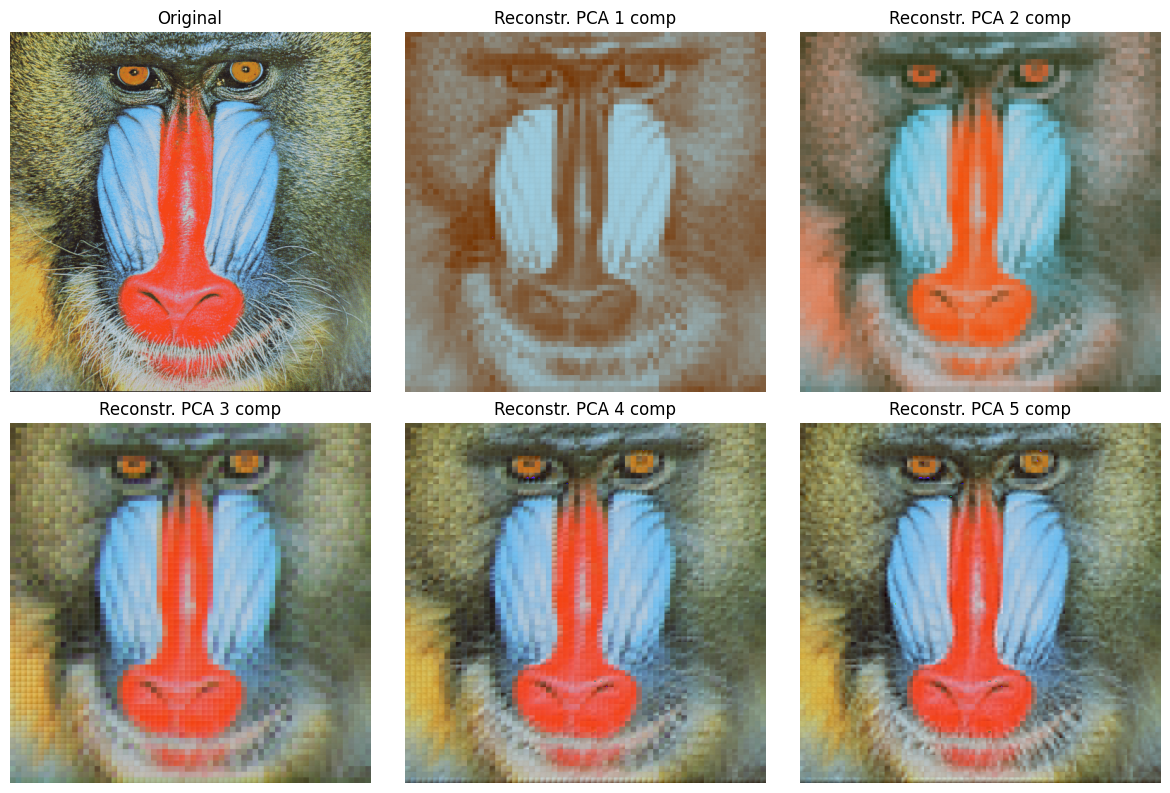

In [165]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(imagen)
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

for i, n_comp in enumerate(range(1, 6)):
    pca = PCA(n_components=n_comp)
    ventanas_red = pca.fit_transform(ventanas)
    ventanas_rec = pca.inverse_transform(ventanas_red)

    reconstruida = np.zeros_like(imagen)
    idx = 0
    for m in range(0, fil, 8):
        for n in range(0, col, 8):
            bloque = ventanas_rec[idx].reshape((8, 8, 3))
            reconstruida[m:m+8, n:n+8, :] = bloque
            idx += 1

    ax = axes[(i+1)//3, (i+1)%3]
    ax.imshow(np.clip(reconstruida.astype(np.uint8), 0, 255))
    ax.set_title(f"Reconstr. PCA {n_comp} comp")
    ax.axis('off')

plt.tight_layout()
plt.show()

**Apartado d**

Al igual que en el apartado a), podemos ver como el aumento de las componentes hace que la calidad de la reconstrucción sea bastante mejor, siendo muy pobre en reconstrucciones como la de 1 o 2 componentes. Al igual que antes, dicha variación puede deberse a la pérdida de información al reducir componentes.